In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('weatherHistory.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.isnull().sum() # learning how many null values of each column

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df['Precip Type'].unique() # I think this nan values of column express there is no precipitation 
# because of that ı won't delete them i only changes values

array(['rain', 'snow', nan], dtype=object)

In [7]:
df['Precip Type'].fillna('none', inplace=True)

/var/folders/dq/drcnmlqj2rd80tmyxn9jk3x00000gn/T/ipykernel_15480/1100305053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna('none', inplace=True)


In [8]:
df['Precip Type'].unique()

array(['rain', 'snow', 'none'], dtype=object)

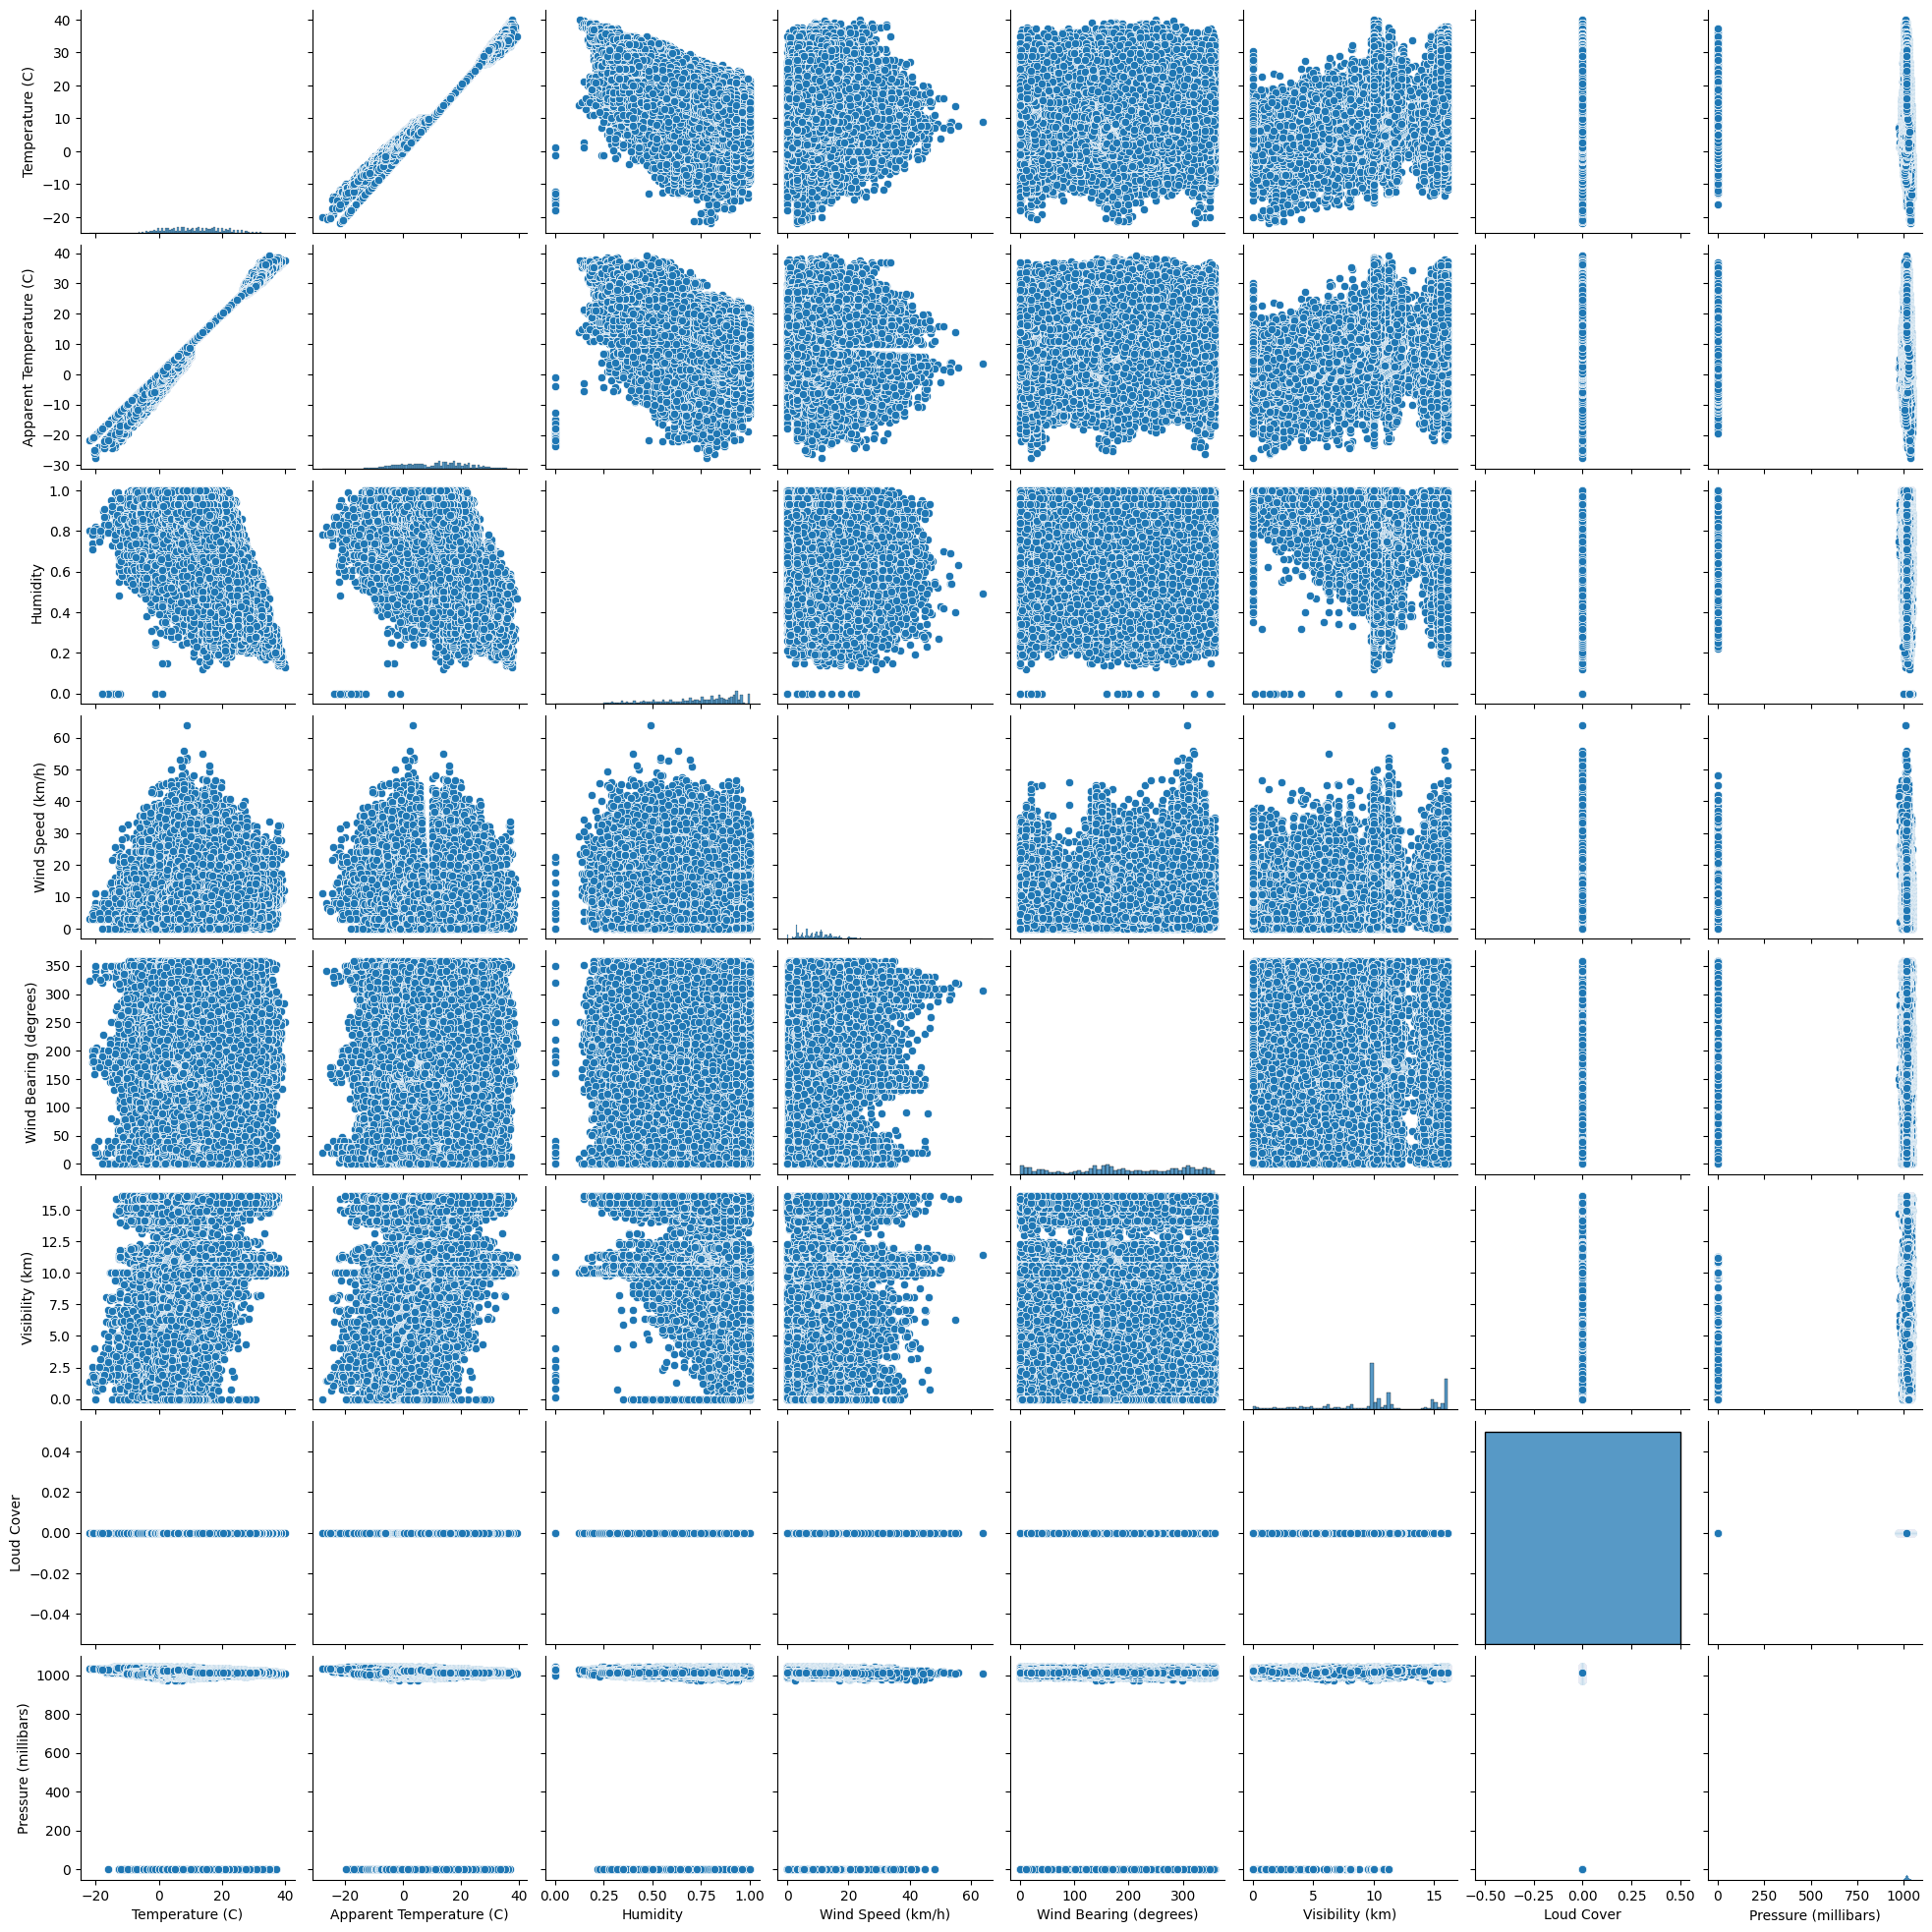

In [9]:
#let's look at all graphs
sns.pairplot(df) # It shows relationships between all features in scatter plots

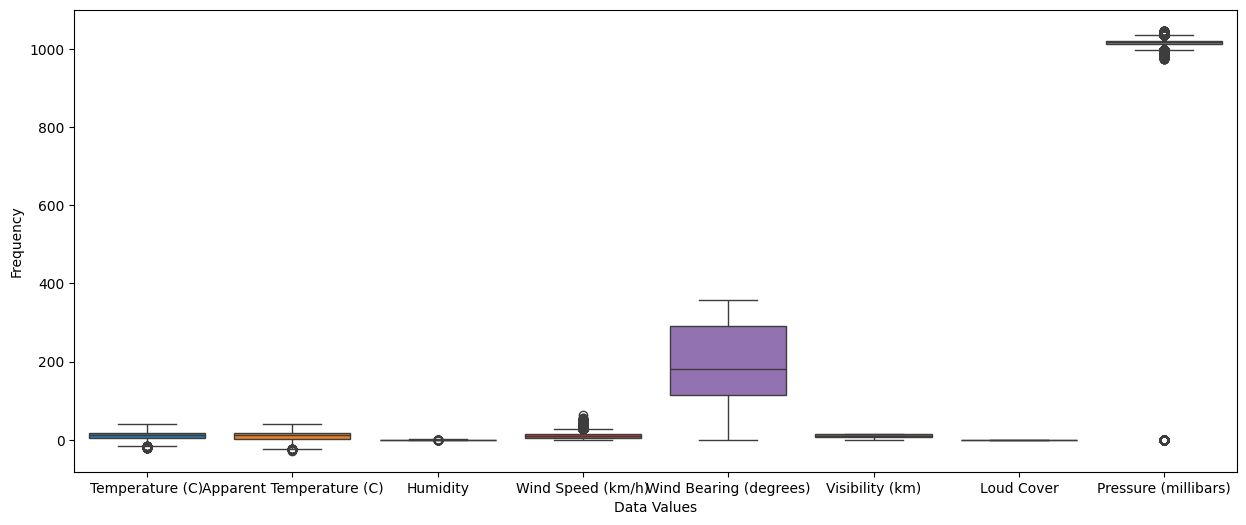

In [10]:
#Let's look at outliers in the columns
plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.show()

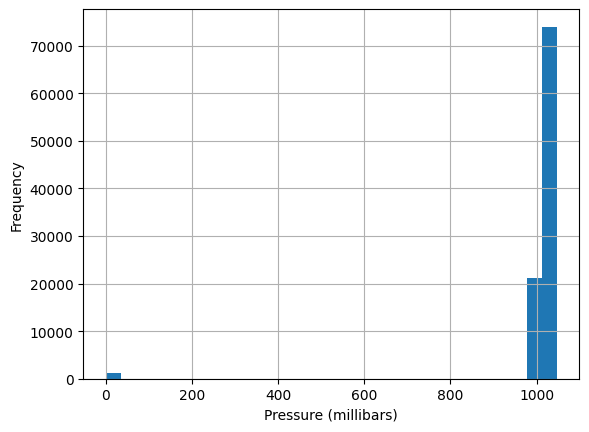

In [11]:
#In Pressure millibars, there are remarkable outliers let's dive it
df['Pressure (millibars)'].hist(bins=30)
plt.xlabel('Pressure (millibars)')
plt.ylabel('Frequency')
plt.show()

In [12]:
# According to my research, pressure millibars couldn't be zero so there is a mistake in dataset
# Let's delete these columns
df = df[df['Pressure (millibars)'] != 0]

In [13]:
df.shape

(95165, 12)

In [14]:
df['Loud Cover'].unique()
# as we see loud cover is same for all columns so we can delete this column it's useless
#for our linear reg model

array([0.])

In [15]:
df.drop('Formatted Date', axis=1, inplace=True)
df.drop('Summary', axis=1, inplace=True)
df.drop('Daily Summary', axis=1, inplace=True)
df.drop('Loud Cover', axis=1, inplace=True)
#Also date,summary and daily summary will not be important for our model

/var/folders/dq/drcnmlqj2rd80tmyxn9jk3x00000gn/T/ipykernel_15480/3184375277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Formatted Date', axis=1, inplace=True)
/var/folders/dq/drcnmlqj2rd80tmyxn9jk3x00000gn/T/ipykernel_15480/3184375277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Summary', axis=1, inplace=True)
/var/folders/dq/drcnmlqj2rd80tmyxn9jk3x00000gn/T/ipykernel_15480/3184375277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [16]:
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [17]:
#Now we should encode precip type I'll use one hot encoding for this
df = pd.get_dummies(df, columns=['Precip Type'], drop_first=True)

In [18]:
df.tail()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,True,False
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,True,False
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,True,False
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,True,False
96452,20.438889,20.438889,0.61,5.8765,39.0,15.5204,1016.16,True,False


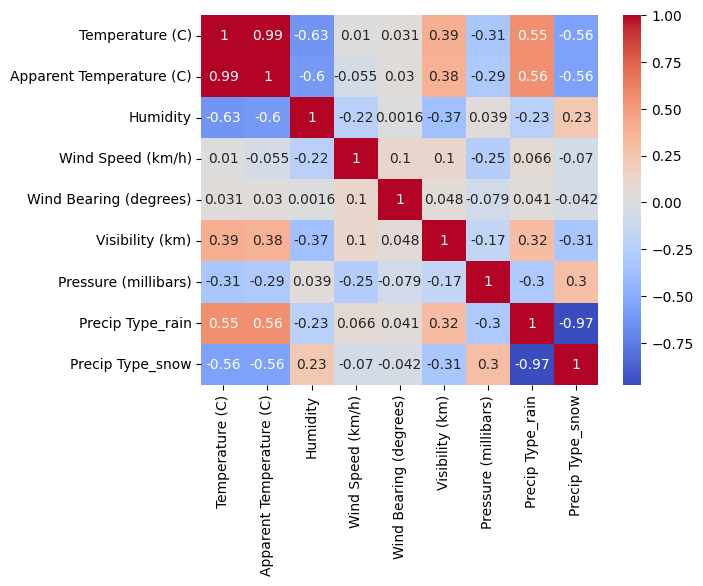

In [19]:
#let's see corr before modeling
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
# Okey our linear regression model's purpose will be predicting apperant temperature
X = df.drop('Apparent Temperature (C)', axis=1)
y = df['Apparent Temperature (C)']

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [22]:
#Now we can delete columns that is more correlated each other ,in our train and test data
#we do this to prevent multicollinearity
def correlation_for_dropping(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr # use these func when you want to drop highly correlated columns from your dataset to reduce multicollinearity and redundancy

In [23]:
correlation_for_dropping(X_train, 0.90)

{'Precip Type_snow'}

In [24]:
cols_to_drop = correlation_for_dropping(X_train, 0.9)
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

In [25]:
X_test.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain
88969,17.461111,0.61,17.2592,20.0,16.1000,1021.59,True
31578,7.777778,0.76,4.8300,280.0,9.9820,1022.50,True
44444,15.227778,0.48,1.2397,195.0,9.9820,1013.67,True
14630,17.288889,0.31,12.8478,31.0,9.9820,1012.84,True
22560,16.644444,0.92,6.7620,38.0,6.2951,1009.90,True


In [26]:
scaler = StandardScaler() # scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # let's import our models

Linear Regression MAE: 0.8409257462628897
Linear Regression MSE: 1.1428954488268528
Linear Regression R2: 0.9900111952930419
Adjusted R2: 0.9900075200429527


/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


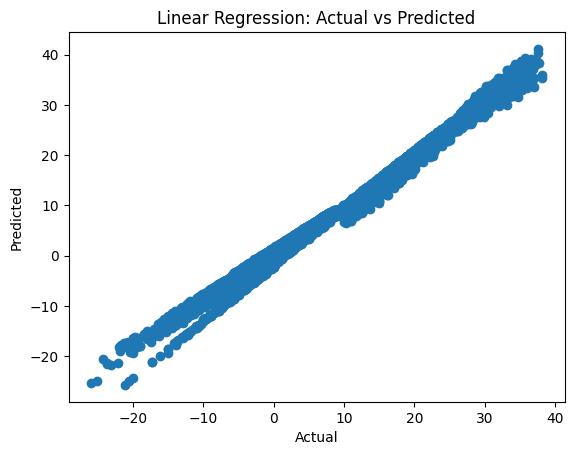

In [28]:
#with linear regression
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression MAE: {mae}')
print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression R2: {r2}')
adjusted_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test_scaled.shape[1] - 1 )
print(f'Adjusted R2: {adjusted_r2}')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()
# Our linear regression model work %99 accurate

Linear Regression MAE: 0.8409266244285565
Linear Regression MSE: 1.1428957500513652
Linear Regression R2: 0.9900111926603664
Adjusted R2: 0.9900075174093085


/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid

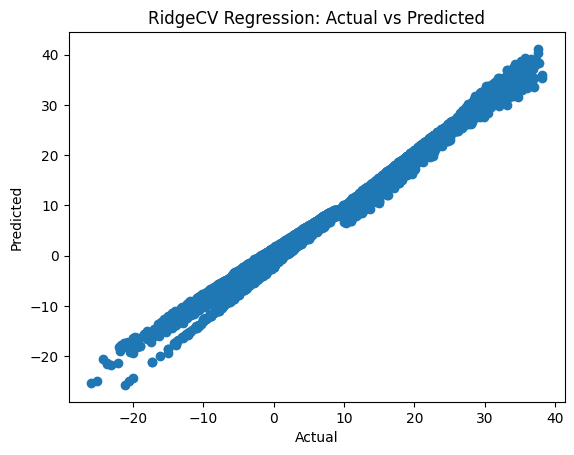

In [29]:
#I want to use RidgeCV also it's R2 score is so close to linear
#Ridge with cross validation to find best alpha
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled, y_train)
y_pred = ridgeCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression MAE: {mae}')
print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression R2: {r2}')
adjusted_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test_scaled.shape[1] - 1 )
print(f'Adjusted R2: {adjusted_r2}')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RidgeCV Regression: Actual vs Predicted')
plt.show()